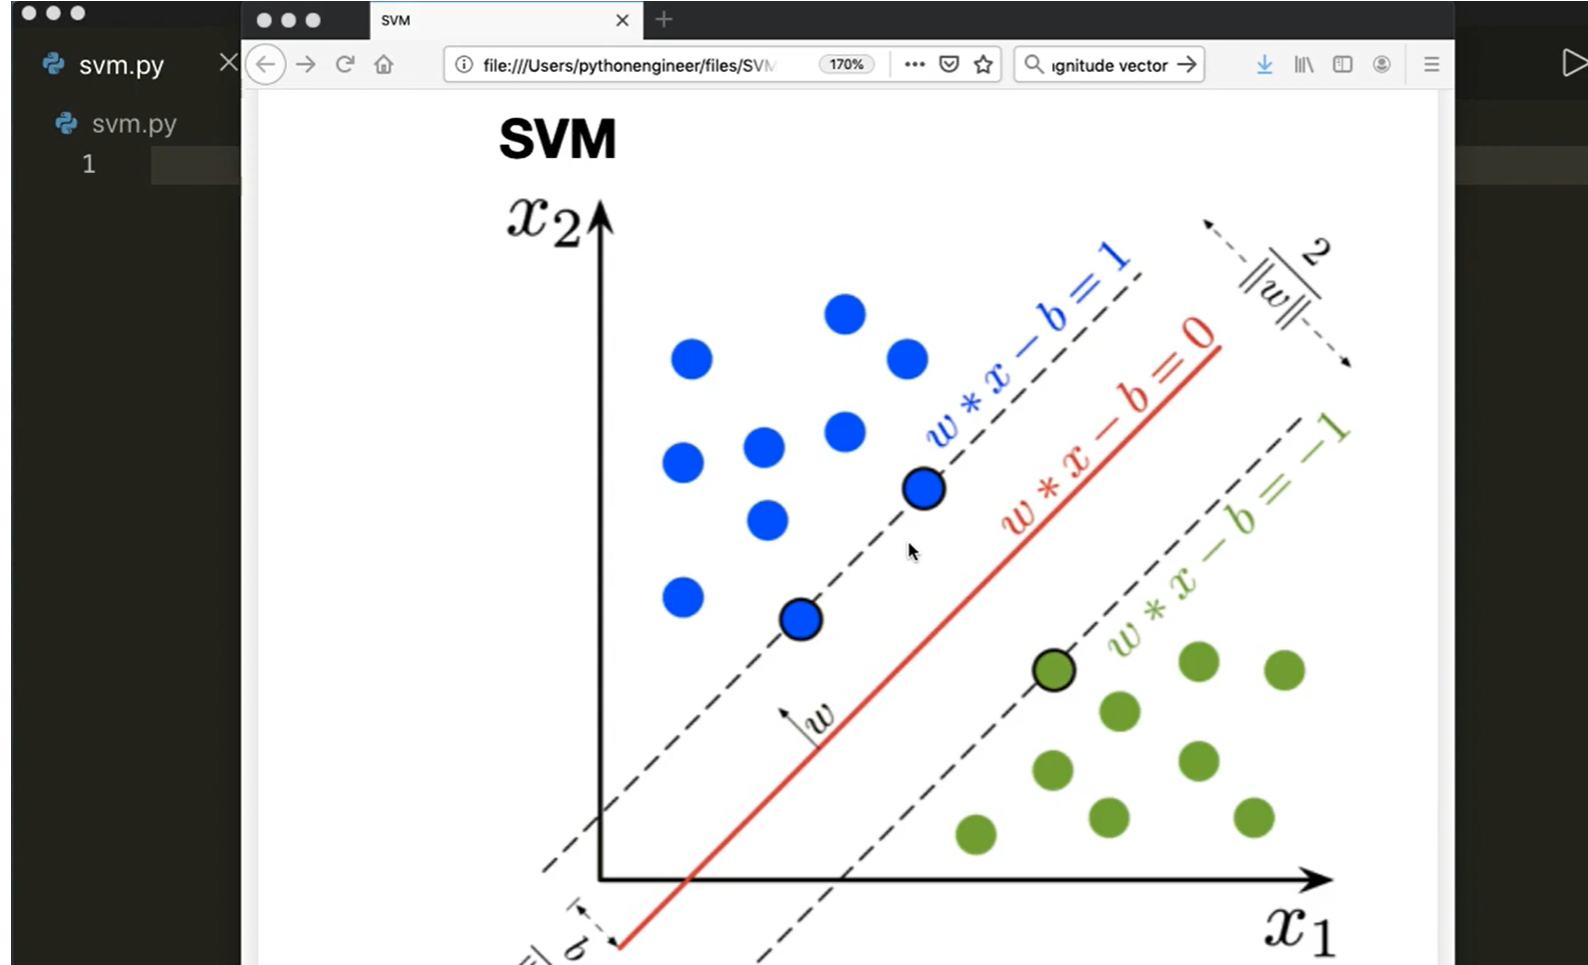

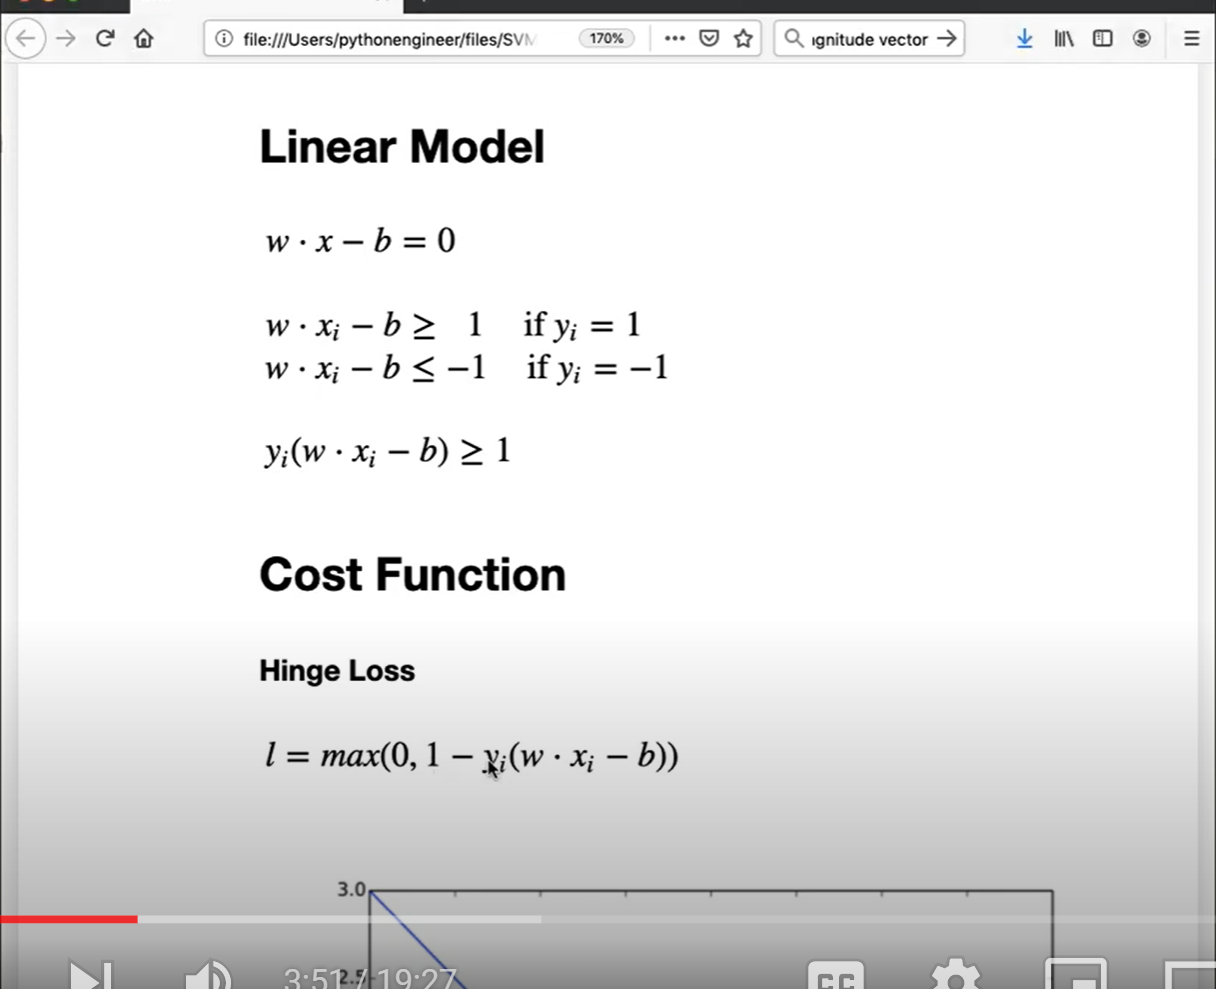

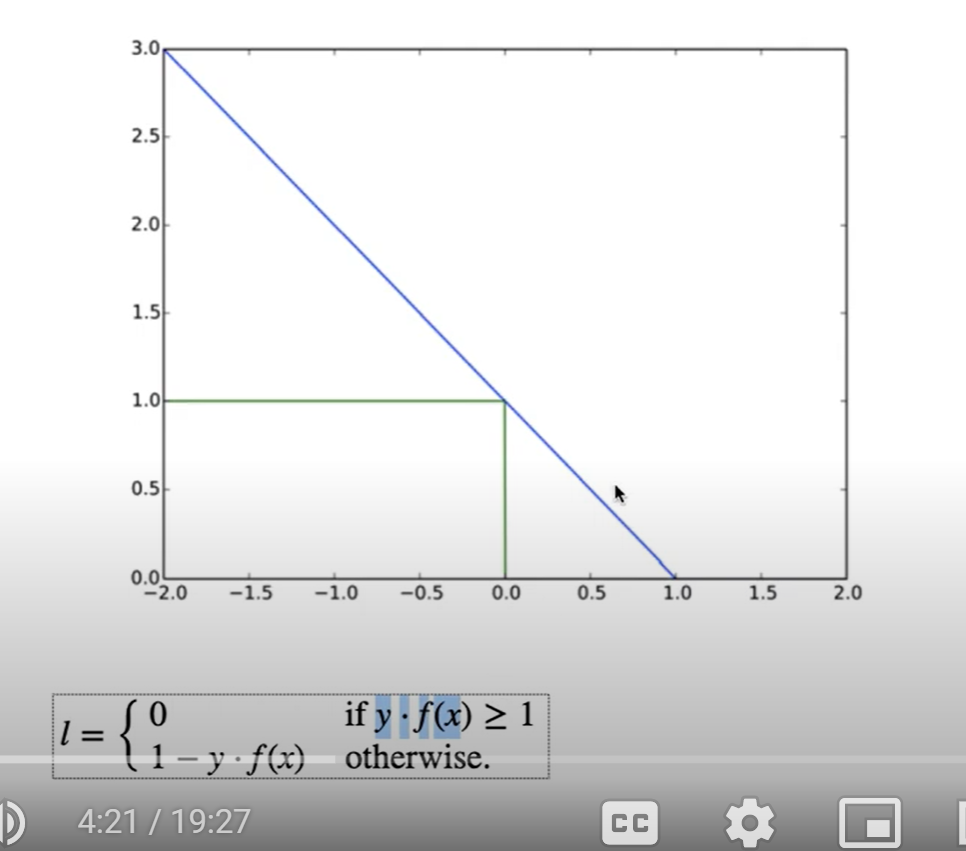

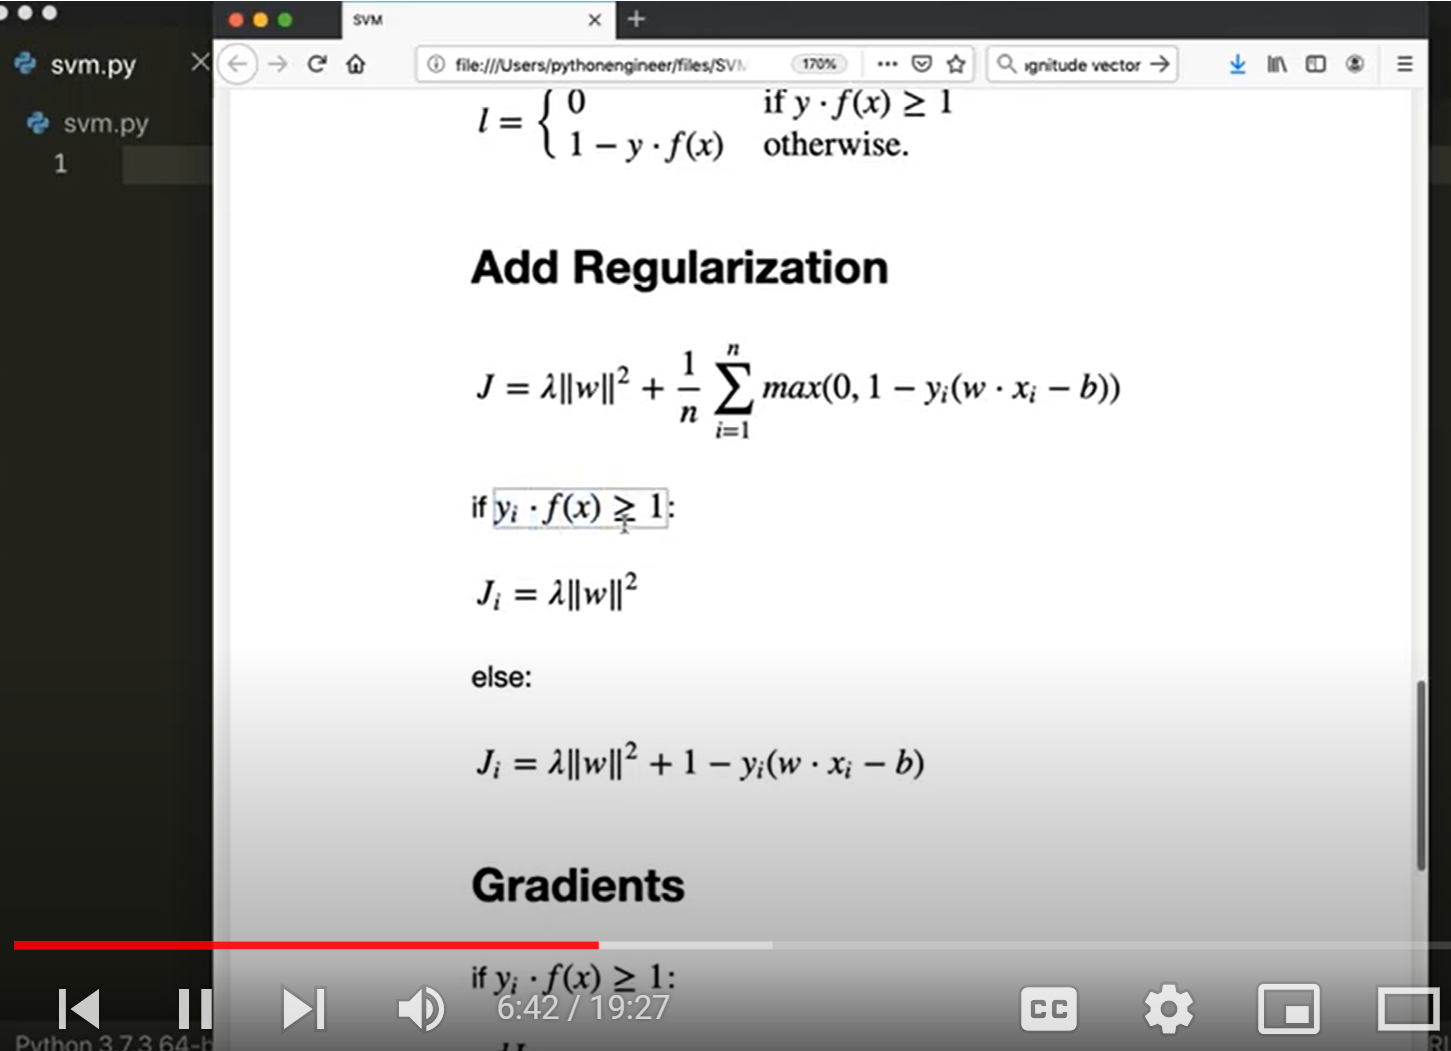

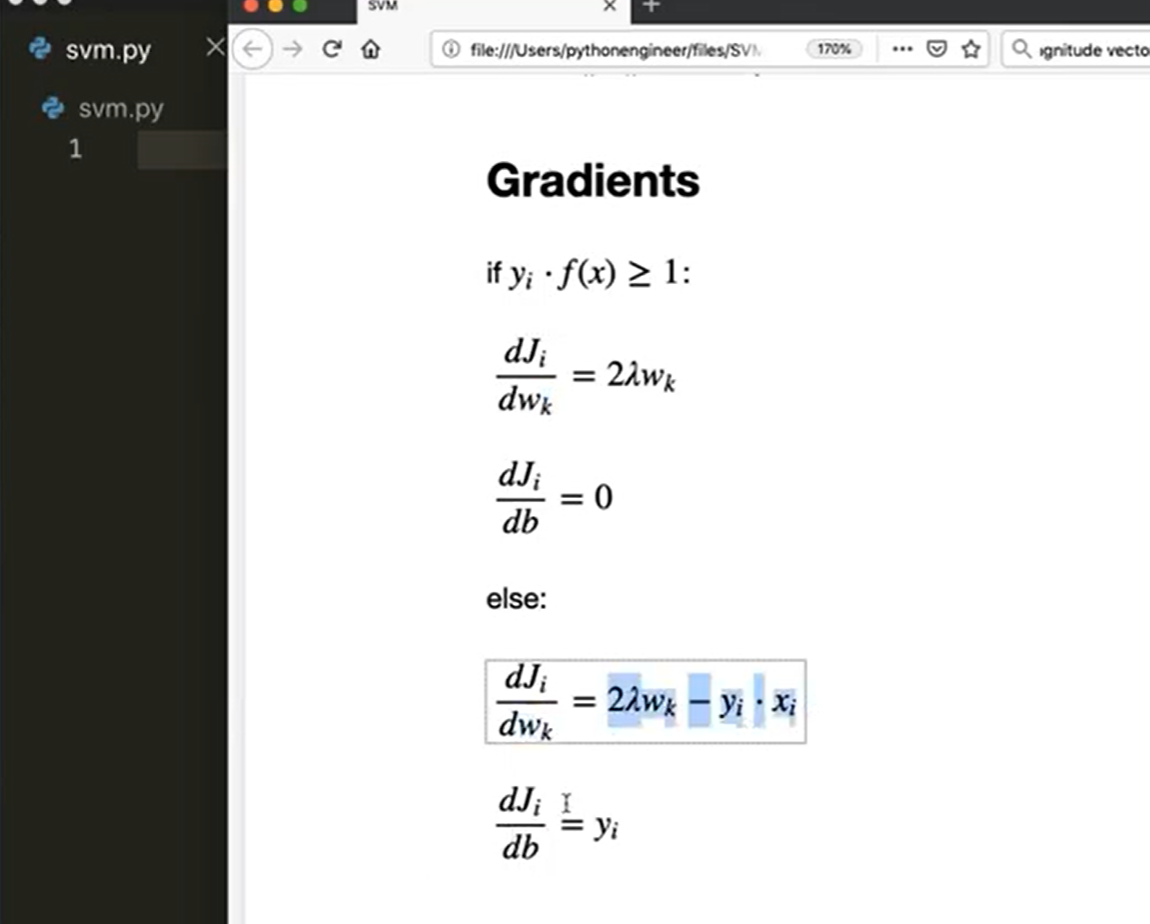

In [1]:
import numpy as np
import pandas as pd

In [2]:
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        
        self.w = None
        self.b = None
        
    def fit(self,X,y):
        #making the labels -1,1 rather than 0,1
        y_ = np.where(y<=0,-1,1) #0 to -1, others to 1
        n_samples,n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx,x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >=1
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    self.w -= dw * self.learning_rate
                
                else:
                    dw = (2 * self.lambda_param * self.w) - y_[idx]*x_i
                    self.w -= dw * self.learning_rate
                    
                    self.b -= self.learning_rate * y_[idx]
                    
    
    def predict(self,X):
        linear_output = np.dot(X,self.w) + self.b
        return np.sign(linear_output)
    
        
    
    

In [3]:
import sklearn
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target

y = np.where(y<=0,-1,1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [4]:
clf = SVM()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [5]:
acc = np.sum(preds == y_test) /len(y_test) 
acc

0.9230769230769231